In [2]:
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib as mpl

textwidth = 455.24411 / 72 # inches
golden_ratio = (1 + 5**0.5) / 2
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams['figure.figsize'] = (textwidth, textwidth / golden_ratio)
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = "Computer Modern Roman"
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['figure.titlesize'] = 12
mpl.rcParams["figure.autolayout"] = True
mpl.rcParams['text.usetex'] = True

import seaborn as sns

import gym
import numpy as np
import pandas as pd
from gym.wrappers import TimeLimit
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.env_checker import check_env

# from src.custom_cnn import CustomCNN
from src.custom_policy import CustomActorCriticPolicy, ReshapeExtractor


Use only one from the cells below:

In [17]:
SIDE_LENGTH = 4
J = 1.0
env_id = "gym_xymodel:xy2d-v0"
env = gym.make(
    env_id,
    L=SIDE_LENGTH,
    J=J,
    max_episode_steps=2 * 4**2,
)

folder_path = "../results/medusa/xy_L4"
model = PPO.load(folder_path + "/model", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [14]:
SIDE_LENGTH = 6
J = 1.0
env_id = "gym_xymodel:xy2d-v0"
env = gym.make(
    env_id,
    L=SIDE_LENGTH,
    J=J,
    max_episode_steps=2 * 4**2,
)

folder_path = "../results/medusa/xy_L6"
model = PPO.load(folder_path + "/model", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [11]:
SIDE_LENGTH = 6
J = 1.0
env_id = "gym_xymodel:xy2d-v0"
env = gym.make(
    env_id,
    L=SIDE_LENGTH,
    J=J,
    max_episode_steps=2 * 4**2,
)

folder_path = "../results/results_medusa/xy2D/L6/continuous/2023-01-08T133217_mlp_nenvs8_nfeatures256_nblocks3"
model = PPO.load(folder_path + "/model", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [18]:
MAX_STEPS = 32
all_energies = [] # list of lists
for i in range(100):
    energies = []
    obs = env.reset()
    lattice_init = env.state_to_lattice()
    energies.append(env.compute_energy())
    for i in range(MAX_STEPS):
        action, _state = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        energies.append(env.compute_energy())
        if done:
            # print(f"{reward=}")
            # # TODO plot lattice function
            # lattice = env.state_to_lattice()
            # ax = plt.figure().add_subplot()
            # x, y = np.meshgrid(np.arange(SIDE_LENGTH),
            #             np.arange(SIDE_LENGTH))
            # ax.quiver(x, y, np.cos(lattice[0,...]), np.sin(lattice[0,...]))
            # plt.xticks([])
            # plt.yticks([])
            # plt.show()
            break
            # env.reset()
        # if i % 100 == 0:
        #   print(f"{i=}, {reward=}")
        #   env.render()
    all_energies.append(energies)


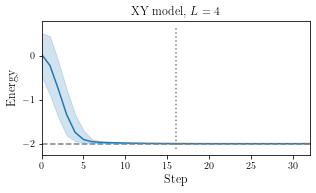

In [21]:

df = pd.DataFrame(all_energies).melt()
# fig, ax = plt.subplots(figsize=(0.7 * textwidth, 0.7 * textwidth / golden_ratio))
fig, ax = plt.subplots(figsize=(0.44 * textwidth * golden_ratio, 0.44 * textwidth))
sns.lineplot(ax=ax, x="variable", y="value", data=df, errorbar=("pi", 95))
plt.xlim(0, env.max_episode_steps)
plt.hlines(-2.0, 0, env.max_episode_steps, linestyles="dashed", colors="gray")
plt.vlines(16, *ax.get_ylim(), linestyles="dotted", colors="gray")
plt.xlabel("Step")
plt.ylabel("Energy")
plt.title(f"XY model, $L={SIDE_LENGTH}$")
# plt.title("XY model, $r$ at every step, $L=6$")

# plt.savefig(f"../results/xy_L{SIDE_LENGTH}_energy.png", dpi=600)
plt.savefig(f"../results/xy_L{SIDE_LENGTH}_energy.pdf")
# plt.savefig(f"../results/xy_L{SIDE_LENGTH}_continuous_energy.pdf")

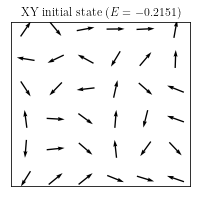

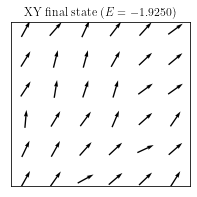

In [11]:
def plot_lattice(lattice):
    # ax = plt.figure().add_subplot()
    fig, ax = plt.subplots(figsize=(0.45 * textwidth, 0.45 * textwidth))
    x, y = np.meshgrid(np.arange(SIDE_LENGTH),
                np.arange(SIDE_LENGTH))
    ax.quiver(x, y, np.cos(lattice[0,...]), np.sin(lattice[0,...]), pivot='mid', scale=10)
    ax.axis('equal')
    ax.set(xlim=(-0.5, SIDE_LENGTH - 0.5), ylim=(-0.5, SIDE_LENGTH - 0.5))
    plt.xticks([])
    plt.yticks([])
    return fig, ax

fig, ax = plot_lattice(lattice_init)
ax.set_title(f"XY initial state $(E={all_energies[-1][0]:.4f})$")
fig.tight_layout()
plt.savefig(f"../results/xy_L{SIDE_LENGTH}_initial_state.pdf")


fig, ax = plot_lattice(env.state_to_lattice())
ax.set_title(f"XY final state  $(E={all_energies[-1][-1]:.4f})$")
fig.tight_layout()
plt.savefig(f"../results/xy_L{SIDE_LENGTH}_final_state.pdf")


# plt.show()



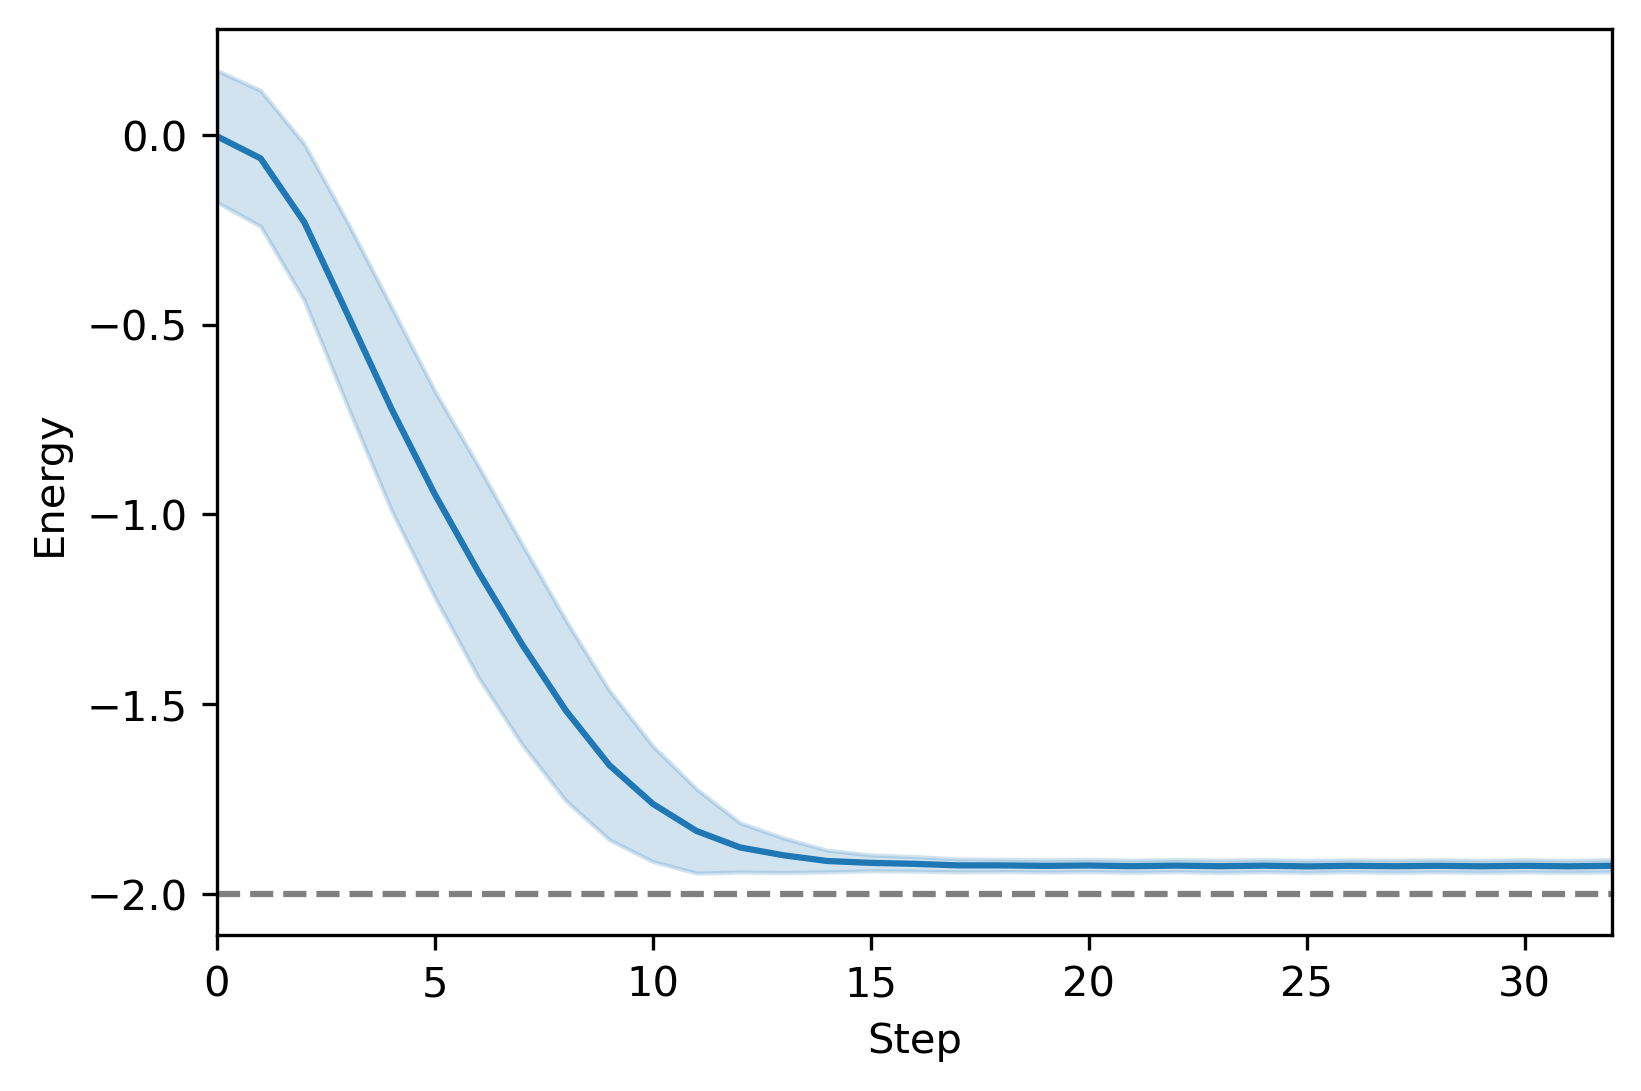

In [11]:
# x, y = np.meshgrid(np.arange(4), np.arange(4))
                      

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3]])

In [7]:
# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

NameError: name 'lattice' is not defined

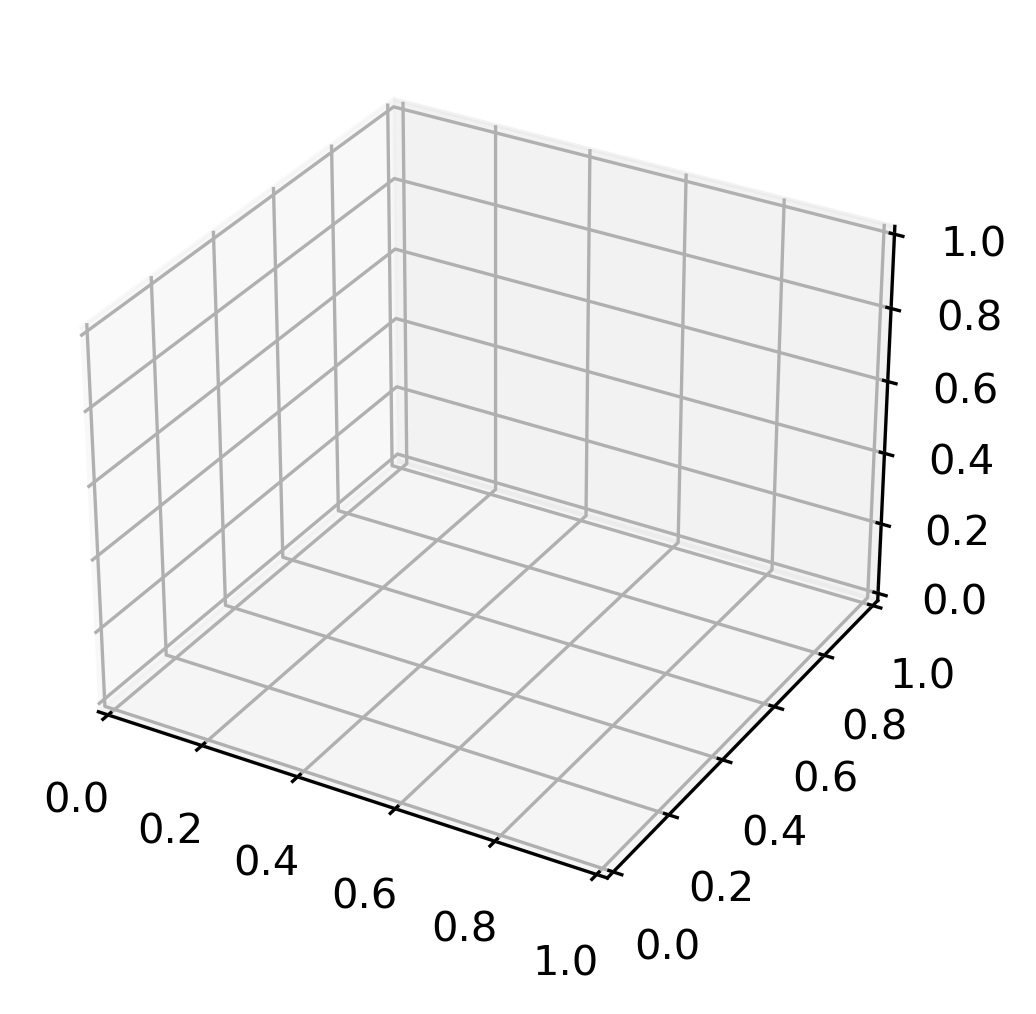

In [8]:
ax = plt.figure().add_subplot(projection='3d')
# ax.quiver(x,y,z,u,v,w, length=0.1, normalize=True)
ax.quiver(x, y, z, lattice[...,:1], lattice[...,1:2], lattice[...,2:3])
ax.set_zlim(-1, 1)
plt.show()

In [64]:
lattice[...,:3]

array([[[-0.21933688,  0.29096863,  0.9312511 ],
        [ 0.21949798, -0.21812934,  0.95091546],
        [ 0.18087499,  0.25501472,  0.94986933],
        [-0.25482208,  0.07315546,  0.96421677]],

       [[-0.1399713 ,  0.23461719,  0.9619578 ],
        [ 0.2858546 , -0.13836475,  0.94823116],
        [-0.08109975, -0.10928087,  0.99069697],
        [ 0.03287575,  0.20738637,  0.97770655]],

       [[ 0.20880572,  0.26109663,  0.94245887],
        [-0.11198289, -0.0479375 ,  0.9925532 ],
        [-0.02214824,  0.1768878 ,  0.9839818 ],
        [-0.09662537,  0.43367508,  0.8958736 ]],

       [[ 0.25431564, -0.04170607,  0.9662216 ],
        [ 0.0295774 ,  0.40446696,  0.91407424],
        [ 0.29945606,  0.08807728,  0.95003605],
        [-0.07352259, -0.24698517,  0.96622604]]], dtype=float32)